In [2]:
import intake
import intake_esm

In [3]:
cat = intake.open_esm_datastore('/lustre/desc1/scratch/chiaweih/d640000.jra3q/catalog/d640000_catalog.json')

In [6]:
cat.df.head()

,path,variable,format,short_name,long_name,units,start_time,end_time,level,level_units,frequency
0,/lustre/desc1/scratch/chiaweih/d640000.jra3q/k...,cdca-pres-fc-ll125,reference,cdca-pres-fc-ll125,Cloud amount,percent,1947-09-01,2025-09-30 21:00:00,air_pressure,hPa,0 days 03:00:00
1,/lustre/desc1/scratch/chiaweih/d640000.jra3q/k...,cwat-pres-fc-ll125,reference,cwat-pres-fc-ll125,Cloud water,kg kg-1,1947-09-01,2025-09-30 21:00:00,air_pressure,hPa,0 days 03:00:00
2,/lustre/desc1/scratch/chiaweih/d640000.jra3q/k...,depr-pres-fc-ll125,reference,depr-pres-fc-ll125,Dewpoint depression (or deficit),K,1947-09-01,2025-09-30 21:00:00,air_pressure,hPa,0 days 03:00:00
3,/lustre/desc1/scratch/chiaweih/d640000.jra3q/k...,hgt-pres-fc-ll125,reference,hgt-pres-fc-ll125,Geopotential height,gpm,1947-09-01,2025-09-30 21:00:00,air_pressure,hPa,0 days 03:00:00
4,/lustre/desc1/scratch/chiaweih/d640000.jra3q/k...,o3mr-pres-fc-ll125,reference,o3mr-pres-fc-ll125,Ozone mixing ratio,kg kg-1,1947-09-01,2025-09-30 21:00:00,air_pressure,hPa,0 days 03:00:00


In [10]:
cat.search(variable='cdca-pres-fc-ll125').df

,path,variable,format,short_name,long_name,units,start_time,end_time,level,level_units,frequency
0,/lustre/desc1/scratch/chiaweih/d640000.jra3q/k...,cdca-pres-fc-ll125,reference,cdca-pres-fc-ll125,Cloud amount,percent,1947-09-01,2025-09-30 21:00:00,air_pressure,hPa,0 days 03:00:00


In [12]:
dict_ds = cat.search(variable='cdca-pres-fc-ll125').to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'variable.short_name'


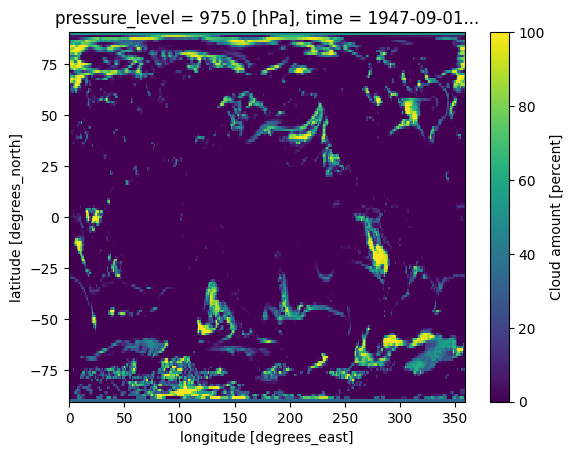

In [15]:
dict_ds['cdca-pres-fc-ll125.cdca-pres-fc-ll125']['cdca-pres-fc-ll125'].isel(time=1, pressure_level=-2).plot()

In [1]:
import ecgtools

In [2]:
def simple_parser(file_path, var_name=None):

    # create basic catalog item
    catalog_item = {'path':file_path, 'variable':var_name, 'format':'reference'}

    return catalog_item

b = ecgtools.Builder(
        paths=['/glade/u/home/chiaweih/gdex-arco-kerchunk/test_json/'],
        depth=0,
        exclude_patterns=None
    )

b.build(parsing_func=simple_parser, parsing_func_kwargs={'var_name': 'icec-sfc-fc-gauss'})


b.save(
        name='jra3q_test_catalog',
        path_column_name='path',
        variable_column_name='variable',
        format_column_name='format',
        data_format='reference',
        groupby_attrs=[
            'variable'
        ],
        aggregations=[
            {'type': 'union', 'attribute_name': 'variable'},
            {
                'type': 'join_existing',
                'attribute_name': 'time_range',
                'options': {'dim': 'time', 'coords': 'minimal', 'compat': 'override'},
            },
        ],
        catalog_type='csv',
        description='JRA3Q test catalog',
        directory='./',
    )


format


AttributeError: 'pydantic_core._pydantic_core.ValidationInfo' object has no attribute 'format'

In [ ]:
b = ecgtools.Builder(
        paths=['/glade/u/home/chiaweih/gdex-arco-kerchunk/test_json/'],
        depth=0,
        exclude_patterns=None
    )

b.build(parsing_func=simple_parser, parsing_func_kwargs={'varname': 'icec-sfc-fc-gauss'})

Builder(paths=['/glade/u/home/chiaweih/gdex-arco-kerchunk/test_json/'], storage_options={}, depth=0, exclude_patterns=[], include_patterns=[], joblib_parallel_kwargs={})

In [18]:
b.df

,path,variable,format,short_name,long_name,units,start_time,end_time,level,level_units,frequency
0,/glade/u/home/chiaweih/gdex-arco-kerchunk/test...,icec-sfc-fc-gauss,json,icec-sfc-fc-gauss,Ice cover,fraction,1949-07-01,1949-07-31 23:00:00,,,0 days 01:00:00
